### RBF Kernel:
 Used to capture complex, non-linear patterns by mapping data into higher-dimensional space, allowing the model to find relationships that linear models cannot detect.

--- RBF SVR (Sampled) Performance ---
MAE: 7.3980
MSE: 96.3904
RMSE: 9.8179
R2 Score: -0.0002
Adjusted R2: -0.0010

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


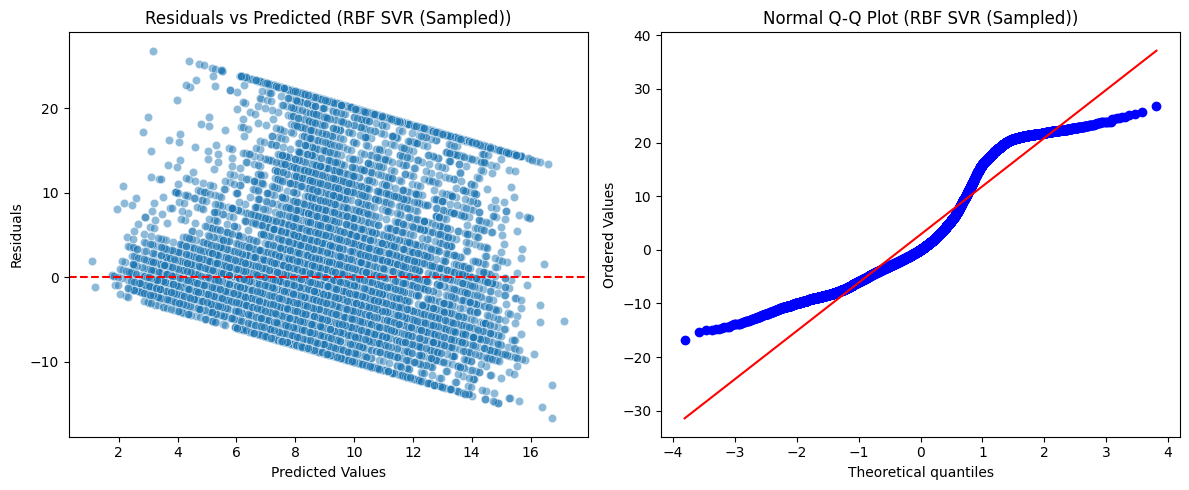

6576

In [ ]:
# --- MODEL 6: SVR with RBF Kernel (Non-Linear) ---
# NOTE: RBF SVR has O(n_samples^2 * n_features) complexity.

# 1. Creating the safe sample (if not already created)
svr_limit = 50000
X_train_svr = X_train_scaled[:svr_limit]
y_train_svr = y_train[:svr_limit]
X_test_svr = X_test_scaled[:10000] # Smaller test set for RBF
y_test_svr = y_test[:10000]

# Using a 10,000 sample (X_train_svr) is mandatory to prevent RAM explosion.
rbf_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 2.Training on the SAMPLE (X_train_svr)
rbf_svr.fit(X_train_svr, y_train_svr)

# 3.Predicting on the SAMPLE (X_test_svr)
rbf_svr_pred = rbf_svr.predict(X_test_svr)

# 4.Numerical Evaluation with the sample
evaluate_regression("RBF SVR (Sampled)", y_test_svr, rbf_svr_pred, X_test_svr)

# --- RAM Optimization ---
del rbf_svr, rbf_svr_pred, X_train_svr, y_train_svr, X_test_svr, y_test_svr
gc.collect()